Here, we intend to produce some simple theoretical HI power spectra, using CAMB. This is to enable comparison with the power spectra calculated from the simulation directly.

In [1]:
import camb
from camb import model, sources
import numpy as np
import matplotlib.pyplot as plt

In [57]:
redshift=4.5

pars =  camb.set_params(H0=67.66, ombh2=0.04897468161869667*0.6766**2, omch2=(0.30964144154550644-0.04897468161869667)*0.6766**2, ns=1)
pars.set_matter_power(redshifts=[redshift], kmax=81)
#HI = sources.GaussianSourceWindow(source_type="21cm")

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=0.026, maxkh=81, npoints = 100)
s8 = np.array(results.get_sigma8())

results.calc_power_spectra()

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=0.026, maxkh=81, npoints = 100)

In [64]:
import postEoR.observations as obs
from scipy.interpolate import make_interp_spline

bias = 2.5

mean_BT = 0.0006274858508004773

camb_BT = pk_nonlin[0,:] * bias**2 * mean_BT**2

AA4 = obs.SKA1LOW_AA4(0)
AAstar = obs.SKA1LOW_AAstar(0)

some_survey = obs.Interferometer(AA4, 6, 3, 10, 5000, 0, 10e6)
comp_survey = obs.Interferometer(AAstar, 6, 3, 10, 5000, 0, 10e6)


/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


15.895018939634568
15.986399648547998


/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/ska_sdp_datamodels/visibility/vis_model.py:87: FutureWarning: the `pandas.MultiIndex` object(s) passed as 'baselines' coordinate(s) or data variable(s) will no longer be implicitly promoted and wrapped into multiple indexed coordinates in the future (i.e., one coordinate for each multi-index level + one dimension coordinate). If you want to keep this behavior, you need to first wrap it explicitly using `mindex_coords = xarray.Coordinates.from_pandas_multiindex(mindex_obj, 'dim')` and pass it as coordinates, e.g., `xarray.Dataset(coords=mindex_coords)`, `dataset.assign_coords(mindex_coords)` or `dataarray.assign_coords(mindex_coords)`.
  super().__init__(data_vars, coords=coords, attrs=attrs)


10000000.0
10000000.0


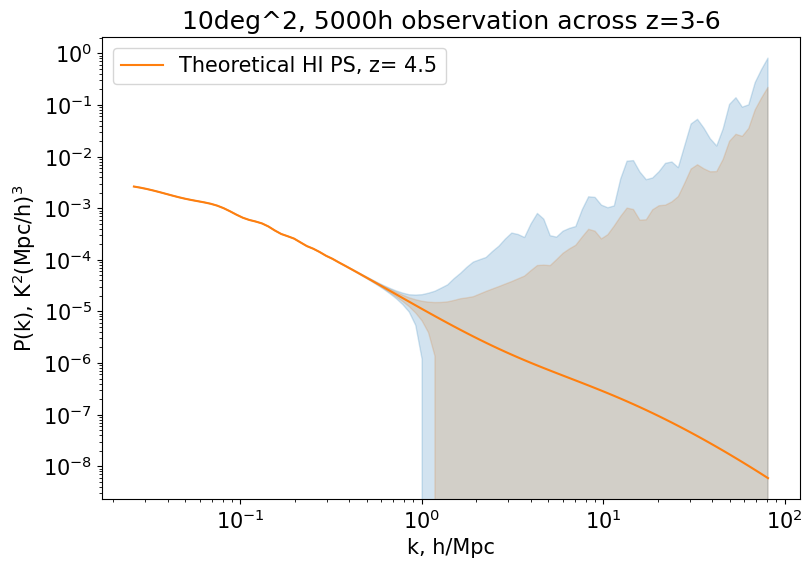

In [65]:
from scipy.interpolate import make_smoothing_spline

kbins=np.geomspace(0.026, 81, 100)
plt.style.use('seaborn-v0_8-ticks')

#BT_k, BT_ps, err= box.get_PS(norm=False, save_fig=False, kbins=kbins)

#smoothed = make_smoothing_spline(BT_k, BT_ps)

#plt.plot(BT_k, smoothed(BT_k), linestyle="--", color="tab:orange", label="Smoothed sim")
#plt.errorbar(BT_k, smoothed(BT_k), err, ecolor="tab:orange", color="tab:orange", linestyle="--", label="Smoothed sim")

BT_k = kh_nonlin
BT_ps = camb_BT

plt.rcParams['figure.figsize'] = [9, 6]

plt.plot(BT_k, BT_ps, color="tab:orange")#, label="Theoretical HI PS, z= " + str(redshift))
ps, k_perp = some_survey.noise_power_perp(redshift)
noise = make_interp_spline(k_perp, ps, k=1)
plt.fill_between(BT_k, BT_ps - noise(BT_k), BT_ps + noise(BT_k), alpha=0.2, color="tab:orange")
ps, k_perp = comp_survey.noise_power_perp(redshift)
noise = make_interp_spline(k_perp, ps, k=1)
plt.fill_between(BT_k, BT_ps - noise(BT_k), BT_ps + noise(BT_k), alpha=0.2, color="tab:blue")
plt.ylabel("P(k), K$^2$(Mpc/h)$^3$")
plt.xlabel("k, h/Mpc")
#plt.title("10deg^2, 5000h observation across z=3-6")
plt.yscale("log")
plt.xscale("log")
plt.legend()

mean_BT 0.000582239647761773
initialised!
initialised!
10000000.0
10000000.0


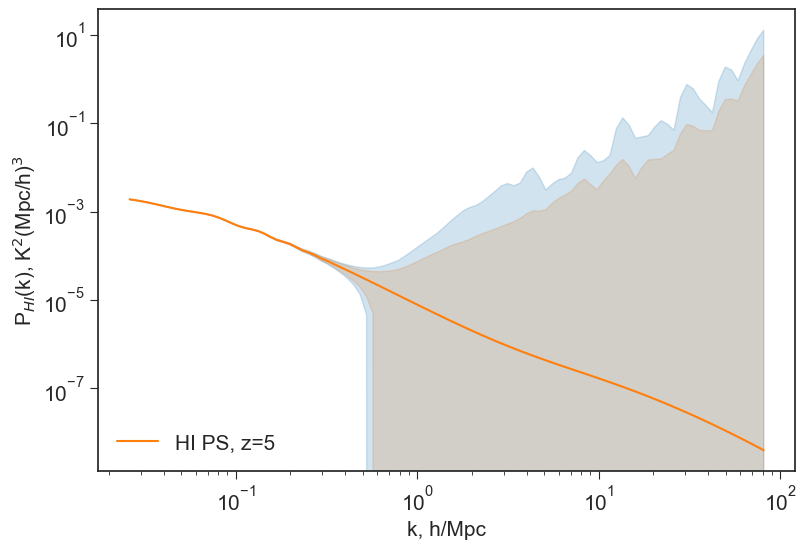

In [3]:
import postEoR.forecasting as fc

fc.gen_ska_low_forecast(z=5, incl_AAstar=True)

Generating small...
inputs in
init conds in
box ran
EoR BT not used.
Optimal overdensity cap used is 8.0
9877
crit dens 5.8160395484597314e-27
min mass of cell before halos 2666149479.774355
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
Generating large...
inputs in
init conds in
box ran
Max BT value=8.647156
Optimal overdensity cap used is 0.64
8825
crit dens 5.8160395484597314e-27
min mass of cell before halos 948889904132.449
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt t

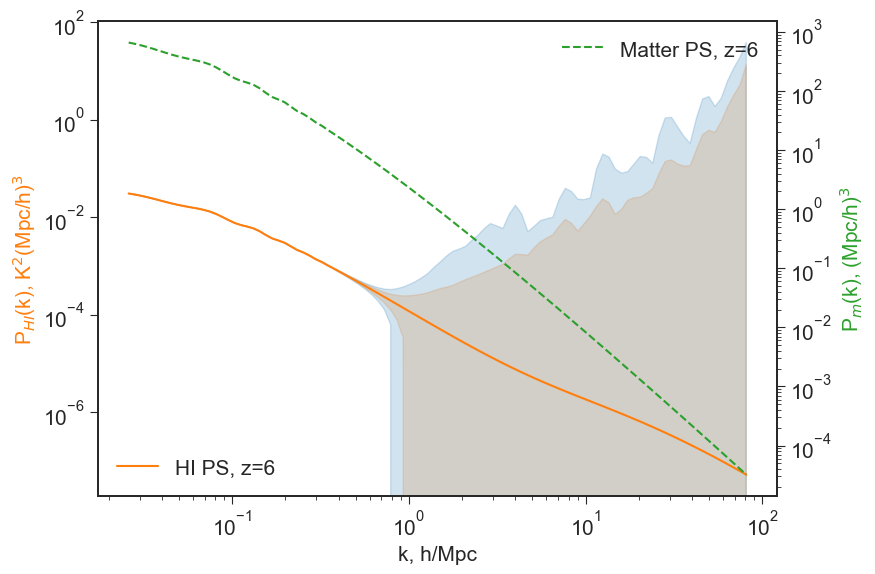

In [2]:
fc.gen_ska_low_forecast(z=6)

Generating small...
inputs in
init conds in
box ran
EoR BT not used.
Optimal overdensity cap used is 8.0
12227
crit dens 5.8160395484597314e-27
min mass of cell before halos 2666143262.9280653
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
Generating large...
inputs in
init conds in
box ran
Max BT value=5.442169
Optimal overdensity cap used is 0.64
10079
crit dens 5.8160395484597314e-27
min mass of cell before halos 948889179460.8591
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
a

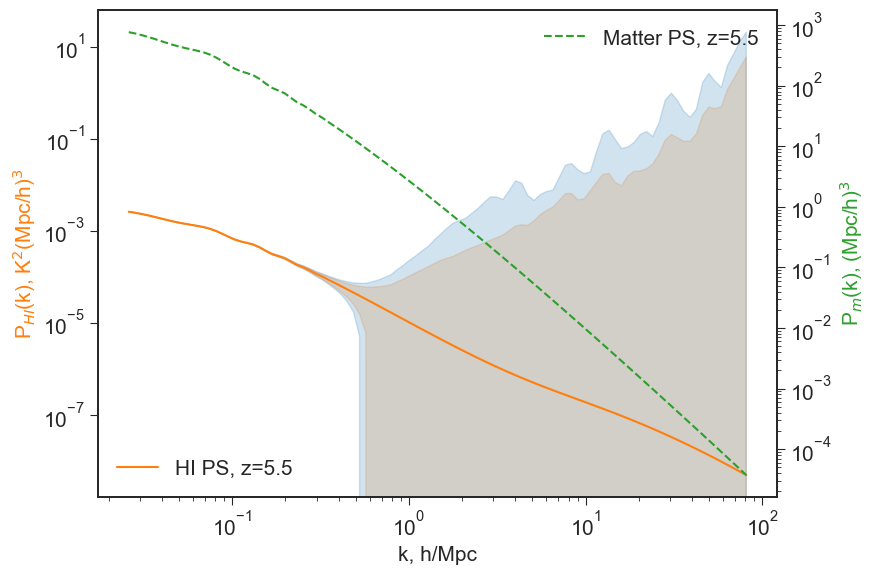

In [3]:
fc.gen_ska_low_forecast(z=5.5)

Generating small...
inputs in
init conds in
box ran
EoR BT not used.
Optimal overdensity cap used is 8.0
14513
crit dens 5.8160395484597314e-27
min mass of cell before halos 2666158238.1885924
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
Generating large...
inputs in
init conds in
box ran
Max BT value=0.0
Optimal overdensity cap used is 0.64
11449
crit dens 5.8160395484597314e-27
min mass of cell before halos 948886972153.5874
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to

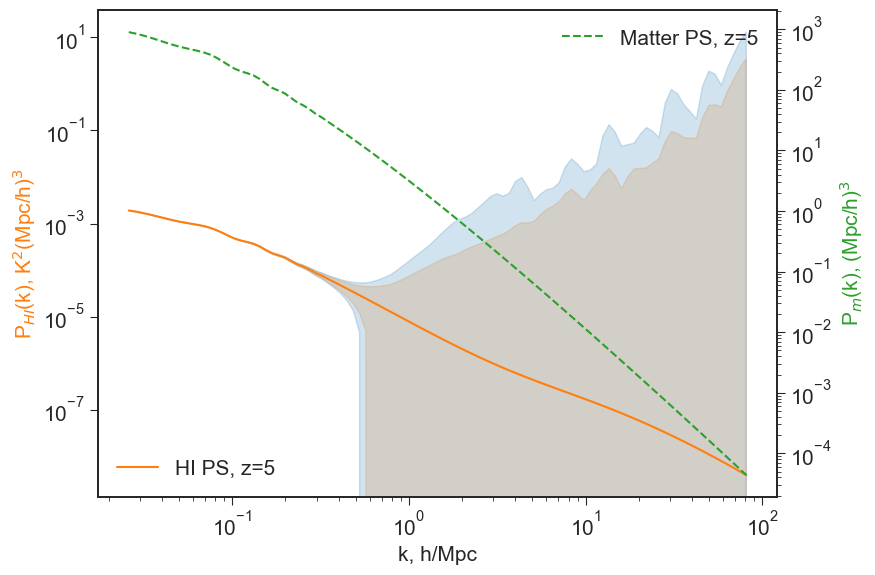

In [4]:
fc.gen_ska_low_forecast(z=5)

Generating small...
inputs in
init conds in
box ran
EoR BT not used.
Optimal overdensity cap used is 8.0
16649
crit dens 5.8160395484597314e-27
min mass of cell before halos 2666149196.7786536
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
Generating large...
inputs in
init conds in
box ran
Max BT value=0.0
Optimal overdensity cap used is 0.64
12872
crit dens 5.8160395484597314e-27
min mass of cell before halos 948896801096.4187
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to

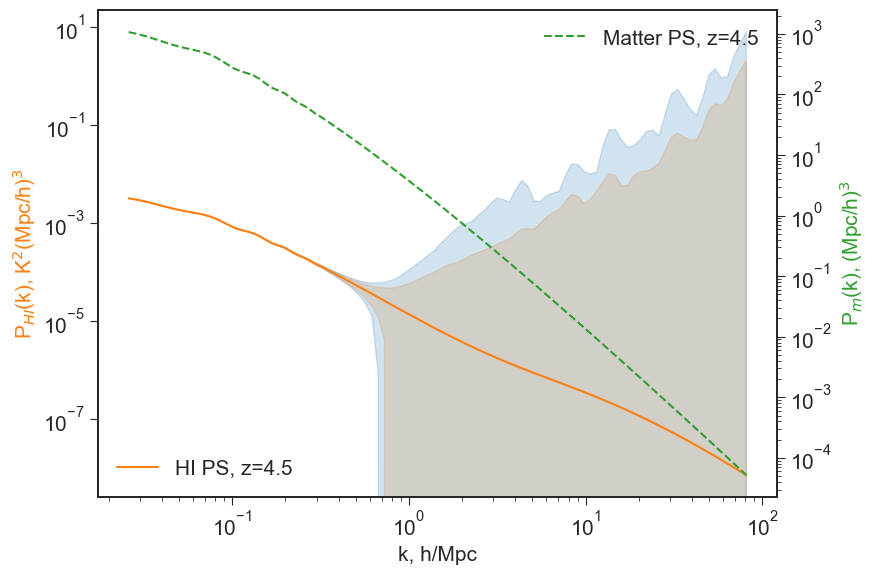

In [5]:
fc.gen_ska_low_forecast(z=4.5)

Generating small...
inputs in


/Users/Rach/opt/anaconda3/envs/fast/lib/python3.11/site-packages/attr/_make.py:2893: UserWarning: Your R_BUBBLE_MAX is > BOX_LEN/3 (50.0 > 19.706375012316485).
  v(inst, attr, value)


init conds in


python(40959) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


box ran
EoR BT not used.
Optimal overdensity cap used is 8.0
poo
9877
crit dens 5.8160395484597314e-27
min mass of cell before halos 2666149196.7708783
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
Generating large...
inputs in
init conds in
box ran
Max BT value=8.647156
Optimal overdensity cap used is 0.64
poo
8825
crit dens 5.8160395484597314e-27
min mass of cell before halos 948889904132.449
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to convolve
abt to c

(0.026, 81)

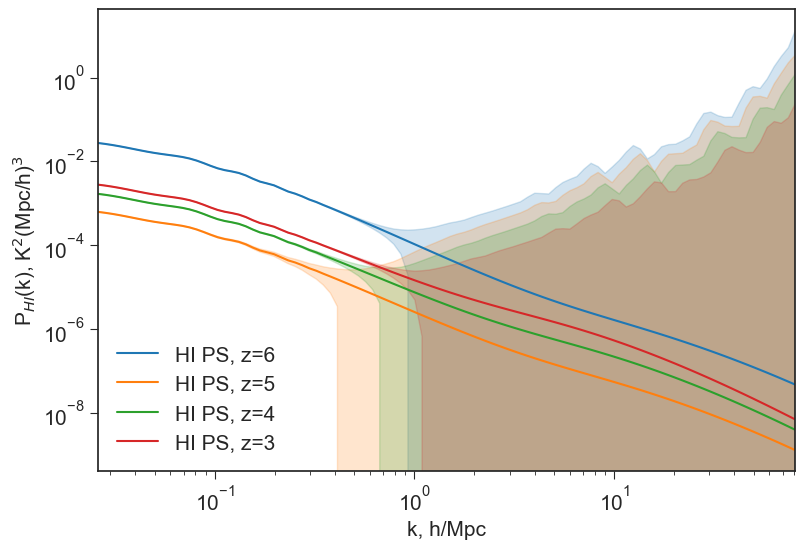

In [1]:
import importlib
import postEoR.forecasting as fc

importlib.reload(fc)

import postEoR.forecasting as fc

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fc.gen_ska_low_forecast(6, fig=fig, ax1=ax, color="tab:blue", HI_model=3)
fc.gen_ska_low_forecast(5, fig=fig, ax1=ax, color="tab:orange", HI_model=3)
fc.gen_ska_low_forecast(4, fig=fig, ax1=ax, color="tab:green", HI_model=3)
fc.gen_ska_low_forecast(3, fig=fig, ax1=ax, color="tab:red", HI_model=3)
ax.set_xlim(0.026, 81)

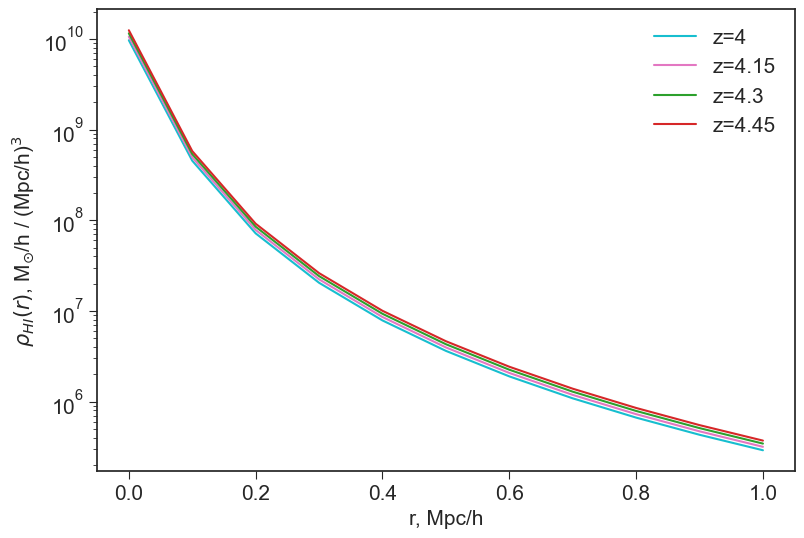

In [4]:
from postEoR.tools import create_spherical_profile
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [9, 6]
fig, ax = plt.subplots(1, 1)
orig_rad = np.linspace(0, 1, 11)
redshifts = np.asarray([4, 4.15, 4.3, 4.45])
masses = np.asarray([1e9])#, 5e9, 1e10, 5e10])
labels = ["z=4", "z=4.15", "z=4.3", "z=4.45"]
colors = ["tab:cyan", "tab:pink", "tab:green", "tab:red", "tab:blue"]
#ax.set_title("$1 \\times 10^9$ M$_{\odot}$/h")
"""ax[0, 1].set_title("$5 \\times 10^9$ M$_{\odot}$/h")
ax[1, 0].set_title("$1 \\times 10^{10}$ M$_{\odot}$/h")
ax[1, 1].set_title("$5 \\times 10^{10}$ M$_{\odot}$/h")"""
ax.set_ylabel("$\\rho_{HI}(r)$, M$_{\odot}$/h / (Mpc/h)$^3$")
#ax[1, 0].set_ylabel("$\\rho_{HI}(r)$, M$_{\odot}$/h / (Mpc/h)$^3$")
ax.set_xlabel("r, Mpc/h")
#ax[1, 1].set_xlabel("r, Mpc/h")
plt.style.use('seaborn-v0_8-ticks')


for i in range(len(masses)):
    for ii in range(len(redshifts)):
        sph_prof = create_spherical_profile(masses[i], redshifts[ii], 0.1, 1)
        radial = sph_prof[10, 10, 10:] / 0.1 ** 3
        if i == 0:
            ax.plot(orig_rad, radial, label=str(labels[ii]), color=colors[ii])
        elif i == 1: 
            ax[0, 1].plot(orig_rad, radial, label=str(labels[ii]), color=colors[ii])
        elif i == 2:
            ax[1, 0].plot(orig_rad, radial, label=str(labels[ii]), color=colors[ii])
        elif i == 3:
            ax[1, 1].plot(orig_rad, radial, label=str(labels[ii]), color=colors[ii])

ax.set_yscale("log")
"""ax[0, 1].set_yscale("log")
ax[1, 0].set_yscale("log")
ax[1, 1].set_yscale("log")"""
"""ax[0, 0].set_xscale("log")
ax[0, 1].set_xscale("log")
ax[1, 0].set_xscale("log")
ax[1, 1].set_xscale("log")"""
ax.legend()

In [8]:
import hickle as hkl

mean_BTa = hkl.load("/Users/Rach/Desktop/padmnabhan-a/mean_BT_cache.hkl")
mean_BTb = hkl.load("mean_BT_cache.hkl")

print(mean_BTa)
print(mean_BTb)

{'6.5': 0.18944124757627784, '6': 0.0027240166102701032, '5.5': 0.0007362654417359077, '5': 0.000582239647761773, '4.5': 0.000695275371273147, '4': 0.0008124178408900613, '3': 0.0008406247593267033, '3.5': 0.001036092572796702}
{'6': 0.002724016607253973, '5': 0.0005822396511342992, '4': 0.0008124178400752445, '3': 0.0008406247593267033}
